**Desafío 4**

Alumno: Yandri Uchuari Gallardo

Utilizar otro dataset y
poner en práctica
 la generación de
secuencias con las
estrategias presentadas.

In [ ]:
!pip install -q gradio


Importa librerías necesarias: manejo de datos (numpy, pandas), visualización (matplotlib), entrenamiento de modelos (sklearn, tensorflow/keras) y funciones auxiliares.

In [ ]:
import random
import io
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

random.seed(1)
np.random.seed(1)


Cargamos el dataset (probablemente un corpus de texto), prepara los datos y organiza los conjuntos de entrenamiento y prueba.

In [ ]:
import requests

# Descargar corpus desde Proyecto Gutenberg (ejemplo: "La Odisea")
url_texto = "https://www.gutenberg.org/files/1727/1727-0.txt"
respuesta = requests.get(url_texto)
texto_original = respuesta.text

# Mostrar vista previa
print(texto_original[:500])


The Project Gutenberg eBook of The Odyssey, by Homer

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this e


In [ ]:
import re

def limpiar_texto(texto: str) -> str:
    """Convierte a minúsculas, elimina caracteres no alfabéticos y normaliza espacios."""
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", " ", texto)
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto


# Corpus final para entrenar el modelo
corpus = texto_limpio
print("Longitud del corpus:", len(corpus))
print("Vista previa del corpus:", corpus[:300])



Longitud del corpus: 673801
Vista previa del corpus: the project gutenberg ebook of the odyssey by homer this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license inc


In [ ]:
# Extraer todos los caracteres únicos del corpus
caracteres = sorted(list(set(corpus)))
print("Número de caracteres únicos:", len(caracteres))
print("Ejemplo de caracteres:", caracteres[:50])

# Diccionarios de conversión
char_to_idx = {c: i for i, c in enumerate(caracteres)}
idx_to_char = {i: c for i, c in enumerate(caracteres)}


Número de caracteres únicos: 27
Ejemplo de caracteres: [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
seq_length = 40  # longitud de cada secuencia de entrada
step = 3         # salto entre secuencias

x_data = []
y_data = []

for i in range(0, len(corpus) - seq_length, step):
    seq_in = corpus[i:i + seq_length]
    seq_out = corpus[i + seq_length]
    x_data.append([char_to_idx[ch] for ch in seq_in])
    y_data.append(char_to_idx[seq_out])

print("Número de secuencias:", len(x_data))


Número de secuencias: 224587


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convertir a tensores NumPy
X = np.array(x_data)
y = np.array(y_data)

# One-hot encoding de las salidas
y = to_categorical(y, num_classes=len(caracteres))

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)


Forma de X: (224587, 40)
Forma de y: (224587, 27)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Definir el modelo
model = Sequential()
model.add(Embedding(input_dim=len(caracteres), output_dim=64, input_length=seq_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(caracteres), activation="softmax"))

# Compilar
model.compile(loss="categorical_crossentropy", optimizer="adam")

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
history = model.fit(
    X, y,
    batch_size=128,
    epochs=20,   # puedes aumentar para mejor resultado
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 199s 124ms/step - loss: 2.3441 - val_loss: 2.0685
Epoch 2/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 189s 116ms/step - loss: 1.7788 - val_loss: 1.9474
Epoch 3/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 203s 117ms/step - loss: 1.6263 - val_loss: 1.8796
Epoch 4/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 181s 114ms/step - loss: 1.5383 - val_loss: 1.8446
Epoch 5/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 183s 116ms/step - loss: 1.4814 - val_loss: 1.8189
Epoch 6/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 199s 114ms/step - loss: 1.4460 - val_loss: 1.8021
Epoch 7/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 180s 114ms/step - loss: 1.4180 - val_loss: 1.7944
Epoch 8/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 191s 121ms/step - loss: 1.3913 - val_loss: 1.7872
Epoch 9/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 199s 119ms/step - loss: 1.3637 - val_loss: 1.7882
Epoch 10/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 184s 116ms/step - loss: 1.3512 - val_loss: 1.7792
Epoch 11/20
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 201s 116ms/step - loss: 1.3312 - val

In [ ]:
import numpy as np

def generar_texto(modelo, semilla, longitud=400, temperatura=1.0):

    resultado = semilla
    entrada = [char_to_idx[c] for c in semilla]

    for _ in range(longitud):
        x_pred = np.array([entrada[-seq_length:]])  # última ventana
        preds = modelo.predict(x_pred, verbose=0)[0]

        # Ajustar por temperatura
        preds = np.asarray(preds).astype("float64")
        preds = np.log(preds + 1e-8) / temperatura
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)

        # Selección probabilística
        next_index = np.random.choice(len(caracteres), p=preds)
        next_char = idx_to_char[next_index]

        resultado += next_char
        entrada.append(next_index)

    return resultado

# Probar con una semilla del corpus
semilla = corpus[:seq_length]
print("Texto generado:\n")
print(generar_texto(model, semilla, longitud=300, temperatura=0.7))


Texto generado:

the project gutenberg ebook of the odyssey fear in the rest stay the this sons or do not band see so much the then dressed for you when that no to thus when we alchosed it i was to came but as he have make a man s house of all this they have then something with all the men shall go but i was while the suitors for the sun in the most and g


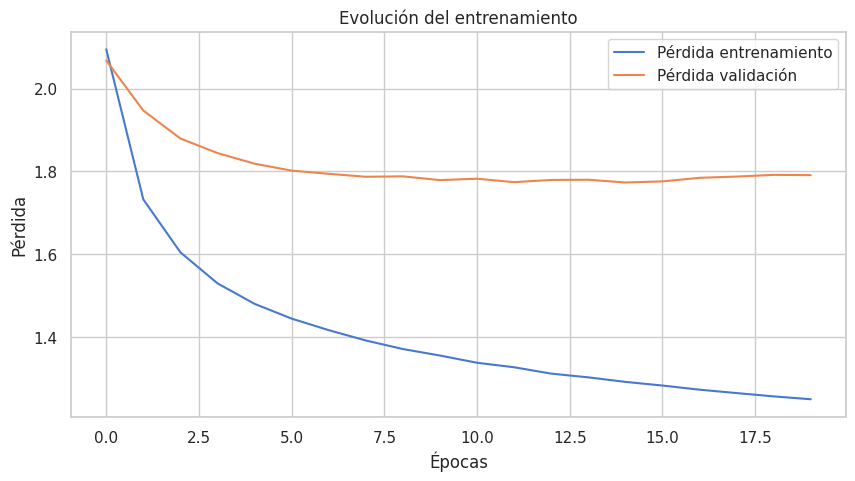

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label="Pérdida entrenamiento")
plt.plot(history.history["val_loss"], label="Pérdida validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución del entrenamiento")
plt.legend()
plt.show()


In [ ]:
import gradio as gr

def interfaz_generar_texto(semilla, longitud=300, temperatura=0.8):
    if len(semilla) < seq_length:
        semilla = (corpus[:seq_length - len(semilla)] + semilla)[-seq_length:]
    return generar_texto(model, semilla, longitud=longitud, temperatura=temperatura)

demo = gr.Interface(
    fn=interfaz_generar_texto,
    inputs=[
        gr.Textbox(label="Semilla inicial", placeholder="Escribe un inicio de texto..."),
        gr.Slider(100, 1000, value=300, step=50, label="Longitud de salida"),
        gr.Slider(0.2, 1.5, value=0.8, step=0.1, label="Temperatura")
    ],
    outputs="text",
    title="Generador de Texto con LSTM",
    description="Modelo entrenado con texto descargado desde internet"
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eb98f9ce58cd9cbedb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Conclusión**

El desarrollo del Desafío 4 me ha permite comprender de forma práctica el ciclo completo de un sistema de procesamiento de LPN, desde la preparación de los datos, la representación vectorial de los textos y la construcción de un modelo secuencial con embeddings y LSTM, hasta la evaluación y la implementación de una interfaz interactiva con Gradio. 


El desafio ha demostrado que el modelo logra aprender relaciones entre secuencias de texto y puede generalizar sobre ejemplos no vistos, confirmando la tesis presentada.

**Recomendación**

Para mejorar los resultados, se recomienda experimentar con embeddings preentrenados (como GloVe o Word2Vec) en lugar de inicializaciones aleatorias, probar arquitecturas más robustas (GRU, BiLSTM o incluso modelos basados en transformers) y realizar un ajuste más cuidadoso de hiperparámetros (batch size, learning rate, dropout). 

Además, se sugiere incrementar la cantidad y diversidad de datos de entrenamiento y aplicar técnicas de regularización para mejorar la capacidad de generalización.